# P05_survey 

### Program to obtain the frequency distribution graph of the gender question from the responses of the applied questionnaire

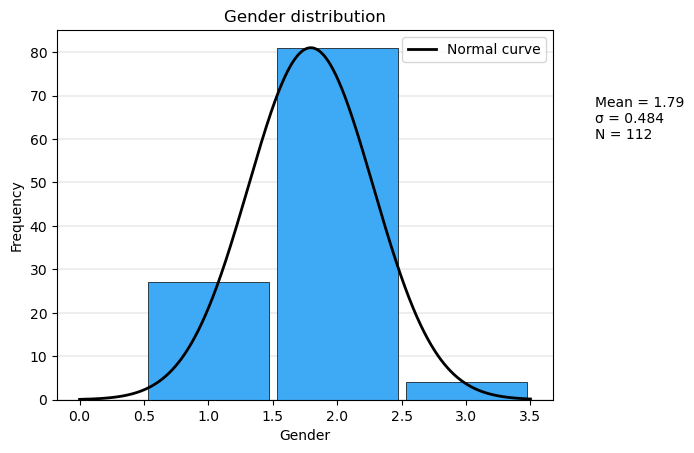

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy import signal
from scipy.stats import norm
import statistics
import math
from pathlib import Path

# Data 
ruta_entrada = Path('..')/'Datasets'/'enc_datosnum.csv'
data = pd.read_csv(ruta_entrada,delimiter=",",encoding = "ISO-8859-1")
df = pd.DataFrame(data)
genero = data['Genero']  

# Get frequency of each category
frecuencia_genero = {}
for g in genero:
    if g in frecuencia_genero:
        frecuencia_genero[g] += 1
    else:
        frecuencia_genero[g] = 1

# Extract labels and frequency values
etiquetas = list(frecuencia_genero.keys())
frecuencias = list(frecuencia_genero.values())



# Create the bar chart
fig, ax = plt.subplots()
ax.grid(axis="y", linewidth=0.3)  # Solo líneas horizontales
ax.set_axisbelow(True)
plt.bar(etiquetas, frecuencias, color='#3eaaf6', linewidth=0.5, edgecolor="black", width=0.94)


x = np.linspace(0, len(etiquetas)+0.5, 1000)
media = np.mean(genero)
desviacion_estandar = np.std(genero)
y = stats.norm.pdf(x, media, desviacion_estandar)

# Scale the normal curve to fit the frequency scale
y = y * max(frecuencias) / max(y)

# Plot the normal curve over the bars
plt.plot(x, y, 'black', label= 'Normal curve', linewidth=2)

# Add the text inside the graph
texto = "Mean = "+str(round(media,2))+"\nσ = "+str(round(desviacion_estandar,3))+"\nN = "+str(112)
#plt.text(len(etiquetas) + 1, 60., texto, fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.5))
plt.text(len(etiquetas) + 1, 60., texto, fontsize=10, color='black')

# Add title and labels
plt.title('Gender distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')

# Add legend
plt.legend()

# Display the graph
#plt.show()

#plt.show()
plt.savefig('HistGenero')